#### For colab

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys 
sh_path = './drive/MyDrive/Colab Notebooks/scripts'
sys.path.insert(0, sh_path)

#### For local development

In [1]:
import sys 
sh_path = '/home/mako/Documents/tesis_mariana/code/scripts'
sys.path.insert(0, sh_path)

# Install dependencies and import thesis code

# Si esta próxima linea falla, ir a
#    Entorno de ejecucion > Reiniciar entorno de ejecucion
# y volver a correr estas primeras dos celdas
!sh '{sh_path}'/install_libraries.sh

In [2]:
from tests import *
from regression import *
%matplotlib inline
# Para elegir que modelo usar para regresión, descomentar la línea con el modelo
# que se quiera usar y comentar las otras dos. Despues correr la celda
REGRESS_MODEL = "VAR" #o "VECM" o "OLS"

# Load dfs

In [3]:
import pandas as pd
df_mensual = pd.read_excel("https://github.com/mbarrena/tesis/blob/main/data/Mensuales%202004%20a%202023.xlsx?raw=true")
display(df_mensual.head())
display(df_mensual.tail())


,Año,Mes,ipc_ajust,Ebc,Efmi,emae,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,tot_04,TOTfmi
0,2004,1,83.199725,2.9428,2.87429,98.417813,78.080841,7.35,2.39,3.68,103.29,95.794785
1,2004,2,83.283418,2.9243,2.91260,98.164075,78.396319,8.28,2.61,3.77,103.43,95.897133
2,2004,3,83.777547,2.8550,2.87591,97.811112,79.027276,9.28,2.75,3.83,102.08,96.306465
3,2004,4,84.496358,2.8452,2.81447,95.063683,79.185015,9.62,2.89,3.88,103.42,96.349037
4,2004,5,85.113715,2.9642,2.90085,96.884676,80.368058,9.56,2.87,3.82,104.63,96.331924


,Año,Mes,ipc_ajust,Ebc,Efmi,emae,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,tot_04,TOTfmi
243,2024,4,65041.239522,876.7500,866.8571,139.368764,111.837003,11.8,4.39,5.90,138.116637,99.382210
244,2024,5,67757.574944,895.2500,885.2045,140.302696,111.363786,11.9,4.51,6.19,129.841031,99.529709
245,2024,6,70858.883726,911.7500,902.3235,139.815874,NaN,11.8,4.48,5.86,121.808680,99.313354
246,2024,7,73715.158346,932.7500,922.1364,NaN,NaN,11.3,4.24,5.52,128.853907,99.305954
247,2024,8,76790.756200,952.8333,NaN,NaN,NaN,NaN,NaN,NaN,129.579941,NaN


In [4]:
df_Arg_mens = df_mensual.copy()

display(df_Arg_mens)
display(df_Arg_mens.tail())

,Año,Mes,ipc_ajust,Ebc,Efmi,emae,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,tot_04,TOTfmi
0,2004,1,83.199725,2.9428,2.87429,98.417813,78.080841,7.35,2.39,3.68,103.290000,95.794785
1,2004,2,83.283418,2.9243,2.91260,98.164075,78.396319,8.28,2.61,3.77,103.430000,95.897133
2,2004,3,83.777547,2.8550,2.87591,97.811112,79.027276,9.28,2.75,3.83,102.080000,96.306465
3,2004,4,84.496358,2.8452,2.81447,95.063683,79.185015,9.62,2.89,3.88,103.420000,96.349037
4,2004,5,85.113715,2.9642,2.90085,96.884676,80.368058,9.56,2.87,3.82,104.630000,96.331924
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2024,4,65041.239522,876.7500,866.85710,139.368764,111.837003,11.80,4.39,5.90,138.116637,99.382210
244,2024,5,67757.574944,895.2500,885.20450,140.302696,111.363786,11.90,4.51,6.19,129.841031,99.529709
245,2024,6,70858.883726,911.7500,902.32350,139.815874,NaN,11.80,4.48,5.86,121.808680,99.313354
246,2024,7,73715.158346,932.7500,922.13640,NaN,NaN,11.30,4.24,5.52,128.853907,99.305954


,Año,Mes,ipc_ajust,Ebc,Efmi,emae,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,tot_04,TOTfmi
243,2024,4,65041.239522,876.7500,866.8571,139.368764,111.837003,11.8,4.39,5.90,138.116637,99.382210
244,2024,5,67757.574944,895.2500,885.2045,140.302696,111.363786,11.9,4.51,6.19,129.841031,99.529709
245,2024,6,70858.883726,911.7500,902.3235,139.815874,NaN,11.8,4.48,5.86,121.808680,99.313354
246,2024,7,73715.158346,932.7500,922.1364,NaN,NaN,11.3,4.24,5.52,128.853907,99.305954
247,2024,8,76790.756200,952.8333,NaN,NaN,NaN,NaN,NaN,NaN,129.579941,NaN


In [5]:
#Recorto dataframe mensual a 2004-2023
df_Arg = df_Arg_mens.iloc[:240].reset_index(drop=True)[['Año','Mes','ipc_ajust', 'Ebc', 'Efmi','emae', 'impp_usa', 'Psoja_USA', 'Pmaíz_USA', 'Ptrigo_USA', 'tot_04', 'TOTfmi']].copy()
df_Arg = renameColumnOfDataframe(df_Arg, "ipc_ajust", "ipc")
df_Arg = renameColumnOfDataframe(df_Arg, "Efmi", "E")

display(df_Arg)
display(df_Arg.tail())

,Año,Mes,Ebc,emae,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,tot_04,TOTfmi,ipc,E
0,2004,1,2.9428,98.417813,78.080841,7.35,2.39,3.68,103.290000,95.794785,83.199725,2.87429
1,2004,2,2.9243,98.164075,78.396319,8.28,2.61,3.77,103.430000,95.897133,83.283418,2.91260
2,2004,3,2.8550,97.811112,79.027276,9.28,2.75,3.83,102.080000,96.306465,83.777547,2.87591
3,2004,4,2.8452,95.063683,79.185015,9.62,2.89,3.88,103.420000,96.349037,84.496358,2.81447
4,2004,5,2.9642,96.884676,80.368058,9.56,2.87,3.82,104.630000,96.331924,85.113715,2.90085
...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023,8,350.0167,149.399215,110.653960,14.10,5.73,7.34,141.164939,100.039970,22805.751986,321.75450
236,2023,9,350.0083,148.683881,111.206047,13.20,5.21,7.06,142.054104,99.802200,25713.428380,349.50480
237,2023,10,350.0083,147.590015,110.496221,12.70,4.93,6.96,141.297132,99.603401,27848.090190,349.52000
238,2023,11,360.5250,145.555263,109.944134,13.00,4.66,6.52,142.396609,99.807961,31415.622744,353.31750


,Año,Mes,Ebc,emae,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,tot_04,TOTfmi,ipc,E
235,2023,8,350.0167,149.399215,110.653960,14.1,5.73,7.34,141.164939,100.039970,22805.751986,321.7545
236,2023,9,350.0083,148.683881,111.206047,13.2,5.21,7.06,142.054104,99.802200,25713.428380,349.5048
237,2023,10,350.0083,147.590015,110.496221,12.7,4.93,6.96,141.297132,99.603401,27848.090190,349.5200
238,2023,11,360.5250,145.555263,109.944134,13.0,4.66,6.52,142.396609,99.807961,31415.622744,353.3175
239,2023,12,808.4833,142.763001,109.155439,13.1,4.80,6.79,138.110029,99.753677,39415.823126,641.9395


In [6]:
df_ERPT_Arg = df_Arg #ARGENTINA, mensual 2004 a 2023. Modelo cálculo ERPT de corto plazo con E nominal, PBI real desestacionalizado, precios externos (P de importados de USA) e IPC.
display(df_ERPT_Arg.head())
df_ERPT_Arg = makeLogColumns(['ipc', 'Ebc', 'E', 'emae', 'impp_usa', 'Psoja_USA', 'Ptrigo_USA', 'Pmaíz_USA', 'tot_04', 'TOTfmi'],df_ERPT_Arg)
display(df_ERPT_Arg.head())
df_ERPT_Arg = makeDiffColumns(['ipc', 'Ebc', 'E', 'emae', 'impp_usa', 'Psoja_USA', 'Ptrigo_USA', 'Pmaíz_USA', 'tot_04', 'TOTfmi'],df_ERPT_Arg)
display(df_ERPT_Arg.head())
display(df_ERPT_Arg.tail())

,Año,Mes,Ebc,emae,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,tot_04,TOTfmi,ipc,E
0,2004,1,2.9428,98.417813,78.080841,7.35,2.39,3.68,103.29,95.794785,83.199725,2.87429
1,2004,2,2.9243,98.164075,78.396319,8.28,2.61,3.77,103.43,95.897133,83.283418,2.91260
2,2004,3,2.8550,97.811112,79.027276,9.28,2.75,3.83,102.08,96.306465,83.777547,2.87591
3,2004,4,2.8452,95.063683,79.185015,9.62,2.89,3.88,103.42,96.349037,84.496358,2.81447
4,2004,5,2.9642,96.884676,80.368058,9.56,2.87,3.82,104.63,96.331924,85.113715,2.90085


,Año,Mes,Ebc,emae,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,tot_04,TOTfmi,ipc,E
0,2004,1,1.079362,4.589222,4.357745,1.994700,0.871293,1.302913,4.637541,4.562208,4.421244,1.055806
1,2004,2,1.073055,4.586640,4.361777,2.113843,0.959350,1.327075,4.638895,4.563276,4.422249,1.069046
2,2004,3,1.049072,4.583038,4.369793,2.227862,1.011601,1.342865,4.625757,4.567535,4.428165,1.056369
3,2004,4,1.045633,4.554547,4.371787,2.263844,1.061257,1.355835,4.638798,4.567977,4.436708,1.034774
4,2004,5,1.086607,4.573521,4.386617,2.257588,1.054312,1.340250,4.650430,4.567800,4.443988,1.065004


,Año,Mes,Ebc,emae,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,tot_04,TOTfmi,ipc,E
1,2004,2,-0.006306,-0.002581,0.004032,0.119143,0.088057,0.024162,0.001354,0.001068,0.001005,0.013240
2,2004,3,-0.023983,-0.003602,0.008016,0.114019,0.052251,0.015790,-0.013138,0.004259,0.005916,-0.012677
3,2004,4,-0.003438,-0.028491,0.001994,0.035983,0.049656,0.012970,0.013042,0.000442,0.008543,-0.021595
4,2004,5,0.040974,0.018974,0.014830,-0.006257,-0.006944,-0.015585,0.011632,-0.000178,0.007280,0.030230
5,2004,6,-0.001181,0.018745,-0.001965,-0.051514,-0.028270,-0.073303,-0.023010,-0.004486,0.005644,0.013372


,Año,Mes,Ebc,emae,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,tot_04,TOTfmi,ipc,E
235,2023,8,0.240180,0.010343,0.006435,-0.041673,-0.082054,-0.036124,0.095899,-0.003091,0.117264,0.189443
236,2023,9,-0.000024,-0.004800,0.004977,-0.065958,-0.095136,-0.038894,0.006279,-0.002380,0.120001,0.082728
237,2023,10,0.000000,-0.007384,-0.006403,-0.038615,-0.055241,-0.014266,-0.005343,-0.001994,0.079751,0.000043
238,2023,11,0.029604,-0.013882,-0.005009,0.023347,-0.056324,-0.065305,0.007751,0.002052,0.120541,0.010806
239,2023,12,0.807599,-0.019370,-0.007199,0.007663,0.029600,0.040577,-0.030566,-0.000544,0.226862,0.597127


# Regress

Realizando regresión con modelo VAR
Año Mes None
     s(1,12)  s(2,12)  s(3,12)  s(4,12)  s(5,12)  s(6,12)  s(7,12)  s(8,12)  \
0        1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2        0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3        0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
4        0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
234      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
235      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
236      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
237      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
238      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

  

/home/mako/Documents/tesis_mariana/scripts/variable_preprocessing.py:64: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  return pd.PeriodIndex(year=data[año_k], month=data[mes_k], freq="M"), "M"
/home/mako/.pyenv/versions/3.12.5/envs/tesis_mariana/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:595: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = to_offset(freq)


,AIC,BIC,FPE,HQIC
0,-29.79,-29.02,1.159e-13,-29.48
1,-31.83,-30.82*,1.502e-14,-31.42*
2,-31.88,-30.64,1.428e-14,-31.38
3,-31.94*,-30.46,1.345e-14*,-31.35
4,-31.90,-30.18,1.412e-14,-31.20
5,-31.84,-29.89,1.493e-14,-31.05
6,-31.77,-29.58,1.610e-14,-30.89


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Oct, 2024
Time:                     13:10:27
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -30.7002
Nobs:                     237.000    HQIC:                  -31.4339
Log likelihood:           2522.48    FPE:                1.36161e-14
AIC:                     -31.9294    Det(Omega_mle):     9.69541e-15
--------------------------------------------------------------------
Results for equation impp_usa
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001176     48294.357671            0.000           1.000
s(1,12)             0.000959     48294.357671            0.000           1.000
s(2,12)             0.004534     48294.357671            0.000   

**Pvalues:**

,const,"s(1,12)","s(2,12)","s(3,12)","s(4,12)","s(5,12)","s(6,12)","s(7,12)","s(8,12)","s(9,12)",...,"s(11,12)","s(12,12)",L1.impp_usa,L1.Ebc,L1.ipc,L1.emae,L2.impp_usa,L2.Ebc,L2.ipc,L2.emae
impp_usa,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,9.090483e-24,0.547459,0.239645,0.500947,0.079298,0.675833,0.164749,0.754325


**Impulso-respuesta:**

Sigma impp_usa: 0.00010772000101692323
Cum effect impp_usa (impulso) - ipc (respuesta): [0.0607277  0.1017491  0.14420635 0.1312467  0.12756747 0.14058525
 0.15793796 0.17485667 0.19239941 0.21134453 0.23177412]
Sigma impp_usa: 0.00010772000101692323
Cum effect impp_usa (impulso) - Ebc (respuesta): [-0.61073726 -0.53050868 -1.07453045 -1.48309176 -1.58744197 -1.57916789
 -1.57179174 -1.56654137 -1.55383565 -1.53395864 -1.50978091]
Sigma Ebc: 0.0039052838243331077
Cum effect Ebc (impulso) - ipc (respuesta): [0.11379873 0.26521534 0.36483874 0.46837608 0.58645254 0.71441641
 0.85005437 0.99396106 1.14692489 1.30975757 1.48316205]
Sigma ipc: 0.0001262723651683281
Cum effect ipc (impulso) - Ebc (respuesta): [ 0.          1.81086098  2.96723015  4.02830576  5.22160307  6.555521
  7.99132157  9.51989364 11.14297476 12.86947366 14.70853075]
Sigma emae: 0.00033538790886480745
Cum effect emae (impulso) - ipc (respuesta): [0.         0.02563882 0.02492526 0.01849205 0.0365084  0.05550778
 0.0687

/home/mako/.pyenv/versions/3.12.5/envs/tesis_mariana/lib/python3.12/site-packages/statsmodels/tsa/vector_ar/plotting.py:208: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True,


Cum effect emae (impulso) - Ebc (respuesta): [ 0.         -0.07587082 -0.34821461 -0.2975971  -0.18971314 -0.17319942
 -0.1794002  -0.16562078 -0.14299125 -0.12089762 -0.09895736]
Sigma impp_usa: 0.00010772000101692323
Cum effect impp_usa (impulso) - emae (respuesta): [0.46797827 0.85295088 0.97530597 1.03203395 1.05670987 1.05911029
 1.06060574 1.06373886 1.06413813 1.06223795 1.05985513]
Sigma Ebc: 0.0039052838243331077
Cum effect Ebc (impulso) - emae (respuesta): [-0.02070644 -0.06206636 -0.04995622 -0.05212394 -0.07426006 -0.09352327
 -0.10835802 -0.12440393 -0.14256681 -0.16201217 -0.18256991]
Sigma ipc: 0.0001262723651683281
Cum effect ipc (impulso) - emae (respuesta): [ 0.08319576 -0.03215411 -0.17160009 -0.2456519  -0.34375338 -0.4771866
 -0.61962493 -0.76615128 -0.9218997  -1.08869798 -1.26657177]


**Resultados descomposición de varianza (FEVD)**

FEVD for impp_usa
     impp_usa       Ebc       ipc      emae
0    1.000000  0.000000  0.000000  0.000000
1    0.994416  0.000074  0.004170  0.001340
2    0.993727  0.000493  0.004529  0.001251
3    0.990409  0.003845  0.004475  0.001271
4    0.986956  0.006050  0.005714  0.001281
5    0.983575  0.007259  0.007881  0.001284
6    0.979737  0.008428  0.010556  0.001279
7    0.975168  0.009833  0.013725  0.001275
8    0.969874  0.011433  0.017423  0.001270
9    0.963891  0.013197  0.021649  0.001263

FEVD for Ebc
     impp_usa       Ebc       ipc      emae
0    0.010289  0.989711  0.000000  0.000000
1    0.009289  0.896171  0.094102  0.000439
2    0.015727  0.852467  0.126011  0.005795
3    0.018790  0.825320  0.150161  0.005729
4    0.017968  0.798954  0.176906  0.006172
5    0.016874  0.769948  0.207366  0.005812
6    0.015800  0.739848  0.238907  0.005444
7    0.014750  0.709800  0.270358  0.005093
8    0.013722  0.680392  0.301123  0.004762
9    0.012719  0.651810  0.331035  0.004435


**Test normality:**

normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     1.440e+04          15.51   0.000  8
----------------------------------------


**Test causality:**

Granger causality F-test. H_0: ['impp_usa', 'Ebc', 'emae'] do not Granger-cause ipc. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         3.322          2.109   0.003 (6, 864)
----------------------------------------------


**Test causality:**

Granger causality F-test. H_0: emae does not Granger-cause ipc. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.4064          3.006   0.666 (2, 864)
----------------------------------------------


**Test causality:**

Granger causality F-test. H_0: ipc does not Granger-cause emae. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         1.562          3.006   0.210 (2, 864)
----------------------------------------------


**Test whiteness:**

Adjusted Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 6 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         79.30          83.68   0.094 64
----------------------------------------



**Raíces:**

[ 5.74928808-0.j         -4.0511165 -0.j         -0.39993866+2.3065165j
 -0.39993866-2.3065165j   0.74059427+1.92896813j  0.74059427-1.92896813j
  2.04731875-0.j          0.93949718-0.j        ]



(<statsmodels.tsa.vector_ar.var_model.VAR at 0x71eb7c5df860>,
 <statsmodels.tsa.vector_ar.var_model.VARResultsWrapper at 0x71eb11af4140>)

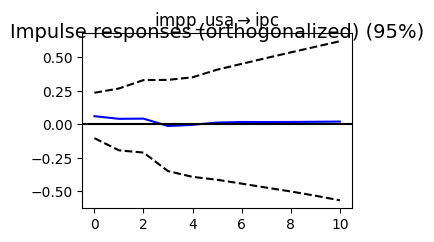

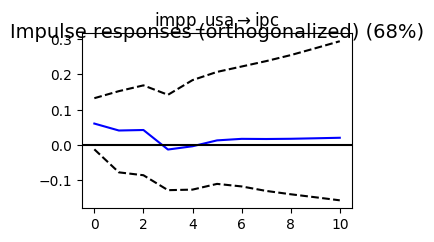

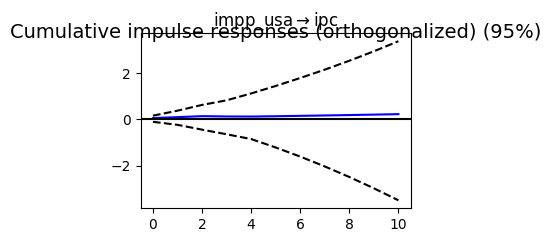

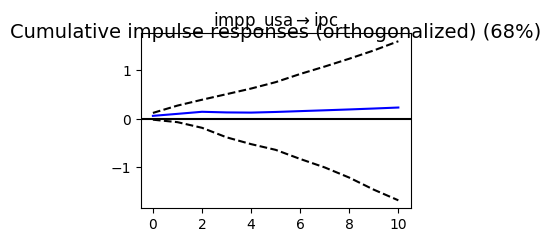

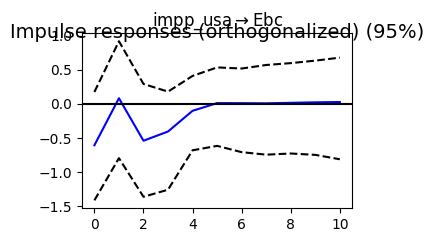

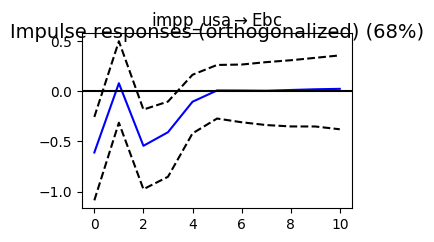

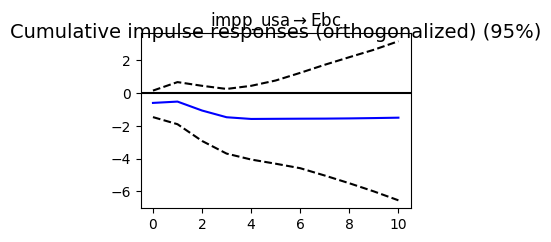

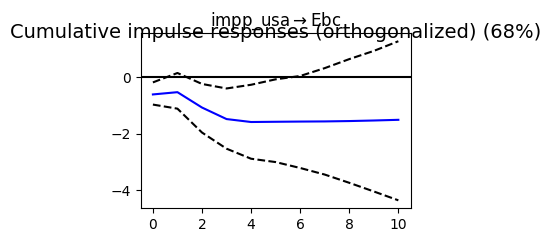

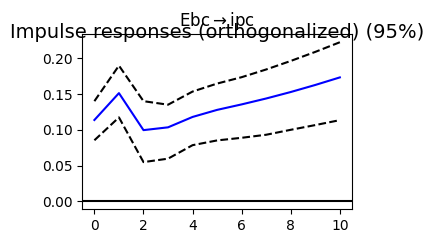

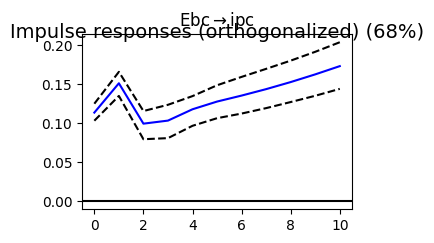

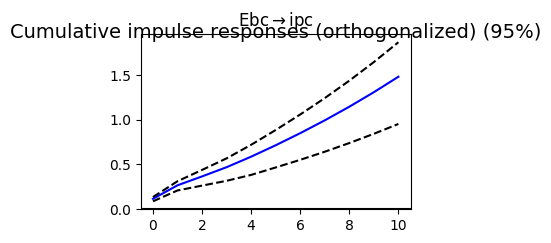

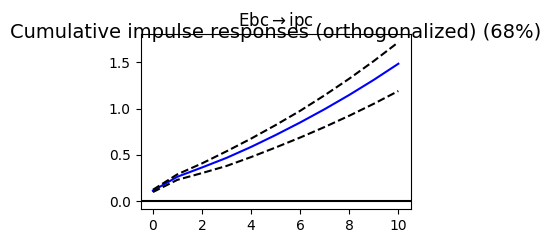

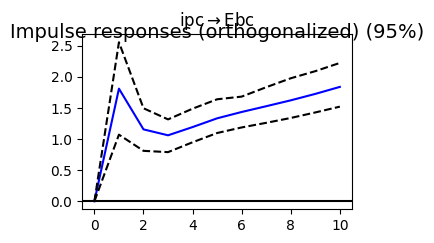

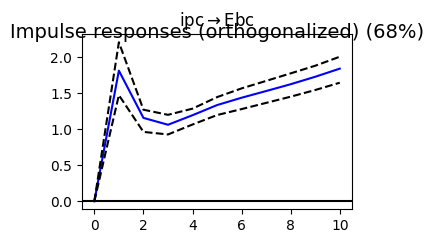

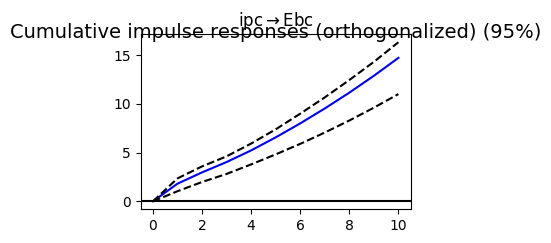

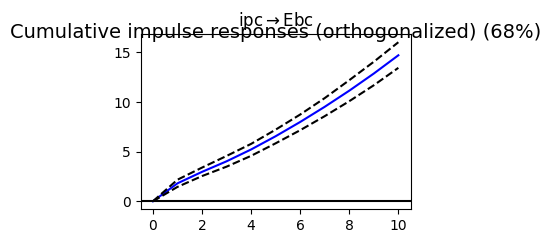

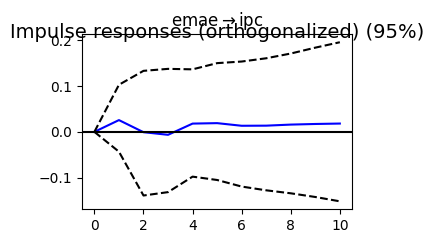

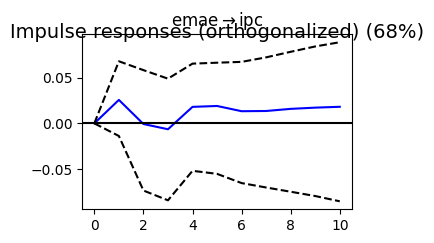

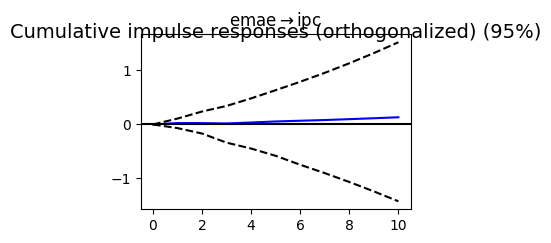

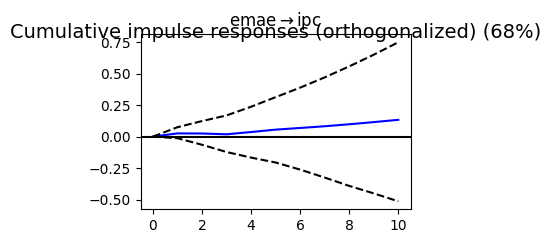

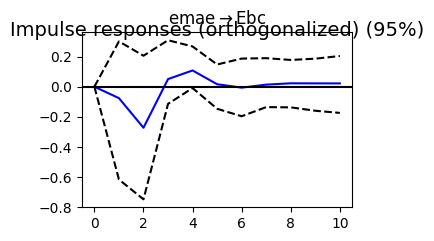

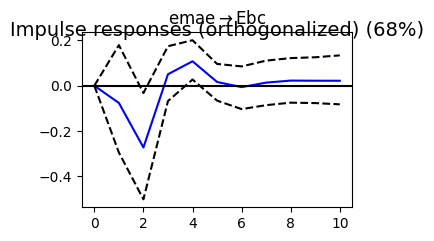

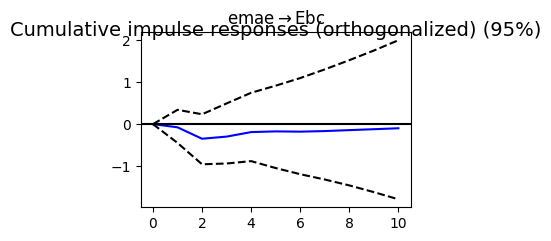

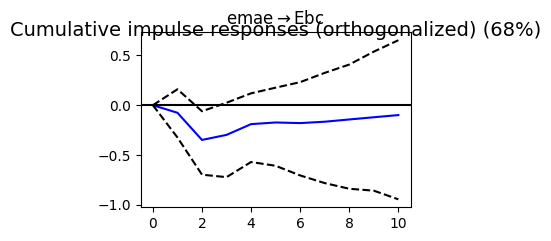

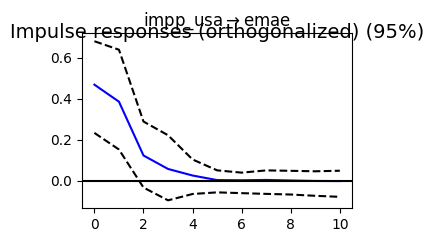

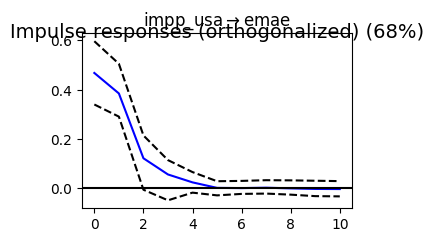

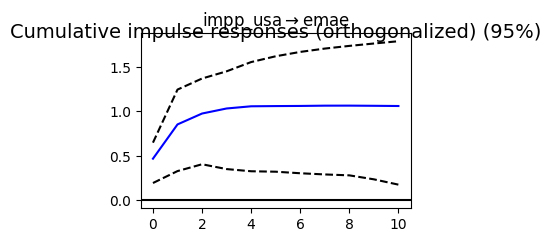

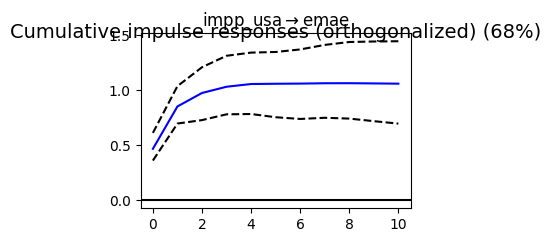

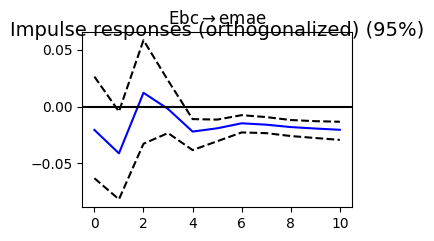

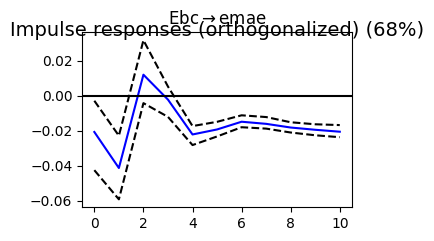

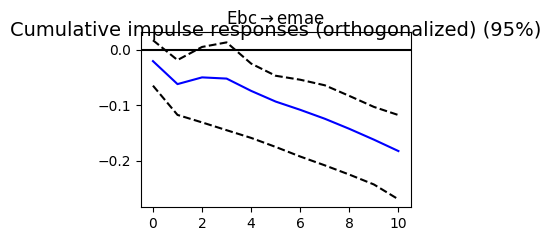

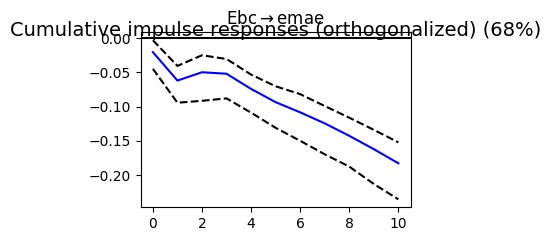

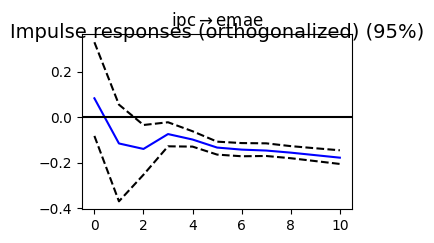

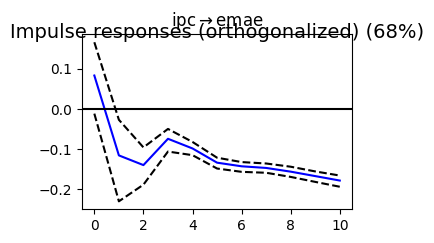

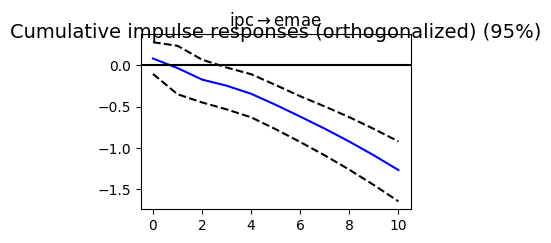

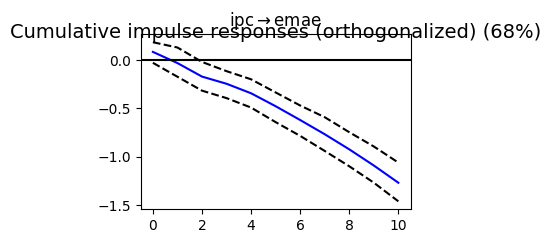

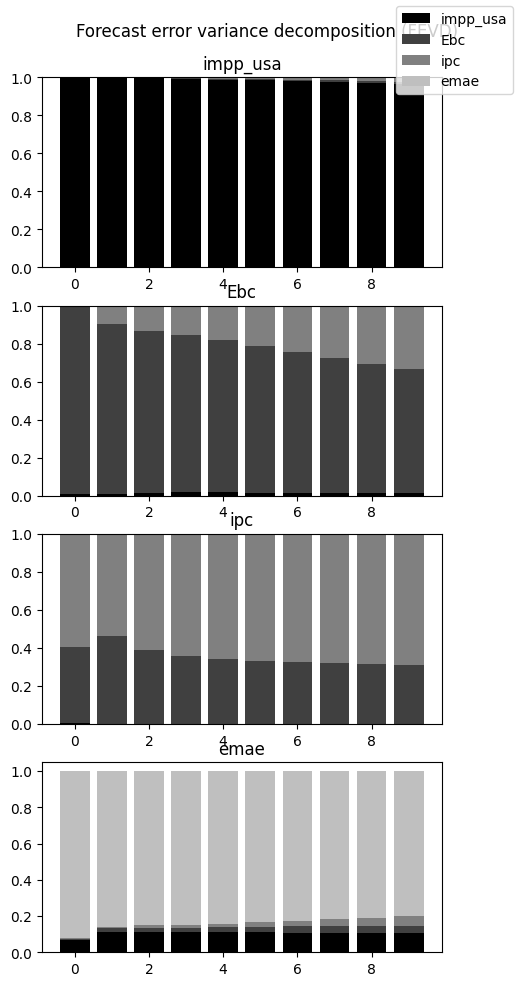

In [7]:
regress(["impp_usa", "Ebc", "ipc", "emae"], df_ERPT_Arg, maxlags=2)